In [67]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import pickle

from imblearn.over_sampling import SMOTE


from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix

In [68]:
df = pd.read_csv("banknote.csv")
df.head()

3.6216  8.6661  -2.8073  -0.44699  0
0  4.54590  8.1674  -2.4586  -1.46210  0
1  3.86600 -2.6383   1.9242   0.10645  0
2  3.45660  9.5228  -4.0112  -3.59440  0
3  0.32924 -4.4552   4.5718  -0.98880  0
4  4.36840  9.6718  -3.9606  -3.16250  0

In [86]:
df.describe()

variance     skewness     curtosis      entropy  authentication
count  1371.000000  1371.000000  1371.000000  1371.000000     1371.000000
mean      0.431410     1.917434     1.400694    -1.192200        0.444931
std       2.842494     5.868359     4.310105     2.101683        0.497139
min      -7.042100   -13.773100    -5.286100    -8.548200        0.000000
25%      -1.774700    -1.711300    -1.553350    -2.417000        0.000000
50%       0.495710     2.313400     0.616630    -0.586650        0.000000
75%       2.814650     6.813100     3.181600     0.394810        1.000000
max       6.824800    12.951600    17.927400     2.449500        1.000000

In [69]:
df.columns = ["variance", "skewness", "curtosis", "entropy", "authentication"]
df.head()

variance  skewness  curtosis  entropy  authentication
0   4.54590    8.1674   -2.4586 -1.46210               0
1   3.86600   -2.6383    1.9242  0.10645               0
2   3.45660    9.5228   -4.0112 -3.59440               0
3   0.32924   -4.4552    4.5718 -0.98880               0
4   4.36840    9.6718   -3.9606 -3.16250               0

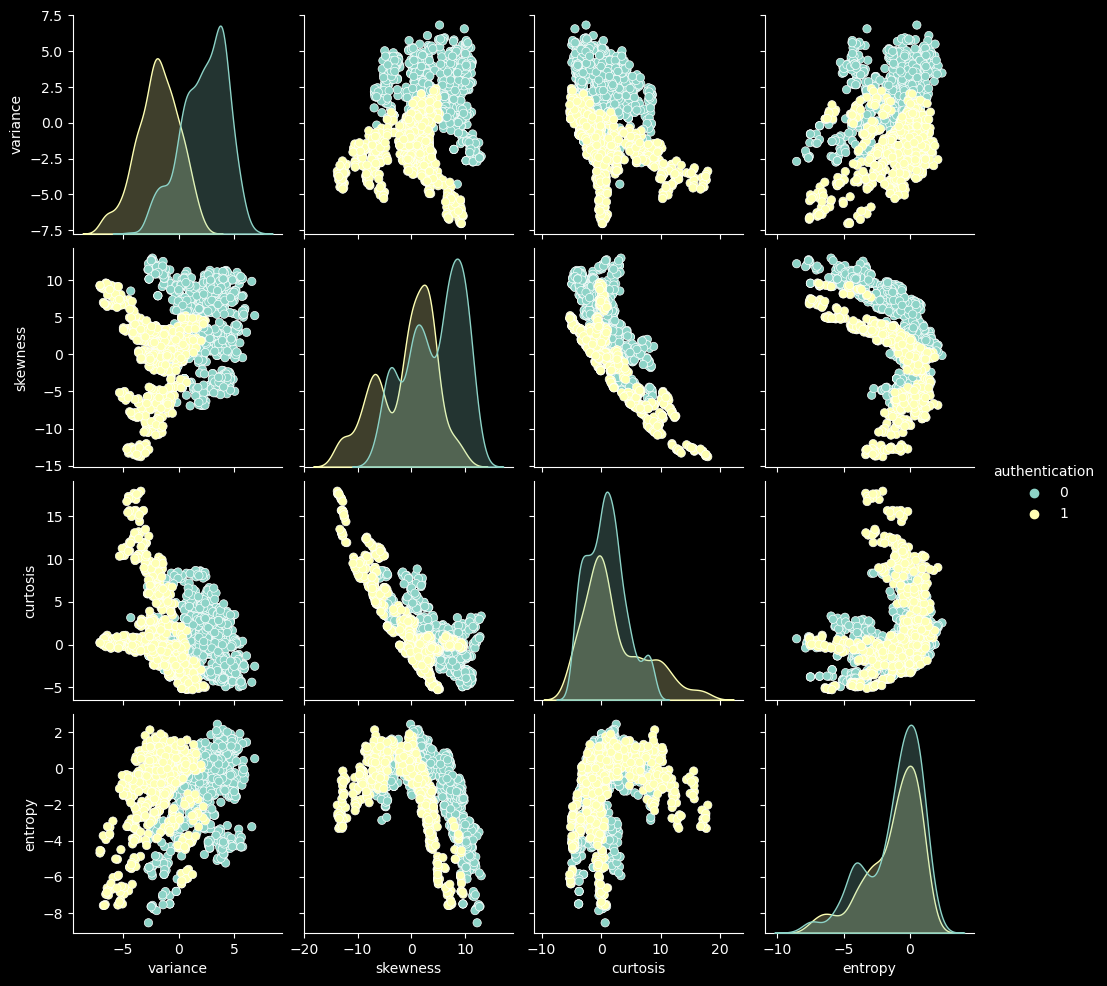

In [70]:
sns.pairplot(df, hue="authentication")

In [71]:
df[df["authentication"] == 1].shape
df[df["authentication"] == 0].shape

(761, 5)

In [72]:
X = df.drop("authentication", axis=1)
y = df["authentication"]

smote = SMOTE()

X, y = smote.fit_resample(X, y)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.27, random_state=42)

In [74]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression()
}

results = {}
for name, classifier in classifiers.items():
    scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')
    results[name] = scores.mean()

results

{'Random Forest': 0.9947454702329595,
 'SVM': 0.9967126833477135,
 'KNN': 1.0,
 'Logistic Regression': 0.9908024158757549}

In [75]:
classifier = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Testing Set:", accuracy)


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.9937017735224012
Accuracy on Testing Set: 0.9975669099756691


In [76]:
classifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [2, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform parameter tuning using GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the testing set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Testing Set:", accuracy)

Best Parameters: {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
Best Score: 1.0
Accuracy on Testing Set: 1.0


In [77]:
knn = KNeighborsClassifier(n_neighbors=2, p=1, weights="uniform")
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

1.0

In [78]:
report = classification_report(y_test, knn.predict(X_test))
matrix = confusion_matrix(y_test, knn.predict(X_test))

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       214

    accuracy                           1.00       411
   macro avg       1.00      1.00      1.00       411
weighted avg       1.00      1.00      1.00       411



<Axes: >

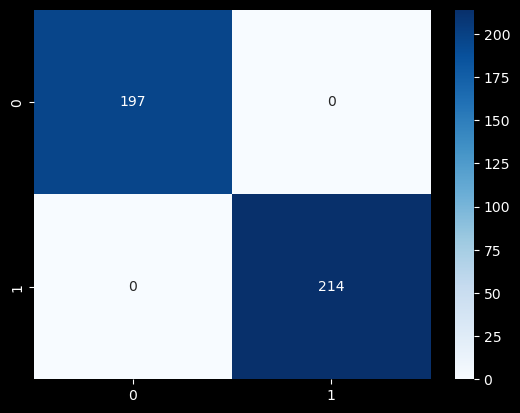

In [82]:
cm = confusion_matrix(y_test, knn.predict(X_test))

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")


In [80]:
with open('knearest.pkl', 'wb') as f:
    pickle.dump(knn, f)